# Experiment Leaderboard Analysis

This notebook analyzes the results stored in `experiments_leaderboard.csv`. It compares different models and latent dimensions based on their R2 scores.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Data

Loaded 5 experiments.


,timestamp,run_id,model_name,latent_dim,epochs,lr,note,checkpoint,Min Ferret Mean (R2),Min Ferret Mean (Low CI),...,Height Median (R2),Height Median (Low CI),Height Median (High CI),Area Median (R2),Area Median (Low CI),Area Median (High CI),Volume Median (R2),Volume Median (Low CI),Volume Median (High CI),avg_r2
0,20251121_214714,bigger_variational_autoencoder_20251121_214714,bigger_variational_autoencoder,3,1500,0.001,Testing bigger autoencoder,checkpoints/bigger_variational_autoencoder/big...,-1.7670,-11.5493,...,-0.4565,-2.4570,0.2704,-0.5172,-2.8861,0.1647,-9.532000e-01,-4.8936,0.0435,-7.708600e-01
1,20251121_215759,bigger_variational_autoencoder_20251121_215759,bigger_variational_autoencoder,4,1500,0.001,Testing bigger autoencoder,checkpoints/bigger_variational_autoencoder/big...,-1.8132,-10.8372,...,-0.5144,-2.8688,0.2694,-0.7048,-3.2351,0.1382,-3.031650e+25,-5.9382,0.0642,-3.031650e+24
2,20251121_220827,variational_autoencoder_20251121_220827,variational_autoencoder,4,1500,0.001,Testing bigger autoencoder,checkpoints/variational_autoencoder/variationa...,-2.3649,-18.2983,...,-0.5475,-2.8348,0.3446,-0.7023,-3.1577,0.1319,-1.540235e+25,-8.3269,0.0891,-1.540235e+24
3,20251121_221507,variational_autoencoder_20251121_221507,variational_autoencoder,4,1500,0.001,Testing bigger autoencoder,checkpoints/variational_autoencoder/variationa...,-2.2892,-14.3696,...,-0.4805,-2.0190,0.3414,-0.7919,-3.4082,0.1729,-1.483614e+25,-6.5714,0.1170,-1.483614e+24
4,20251121_230225,bigger_variational_autoencoder_20251121_230225,bigger_variational_autoencoder,3,1500,0.001,Testing bigger autoencoder,checkpoints/bigger_variational_autoencoder/big...,-1.5988,-11.3778,...,-0.4374,-2.1692,0.2082,-0.5582,-2.6692,0.1764,-8.147000e-01,-5.2754,0.0597,-7.414700e-01


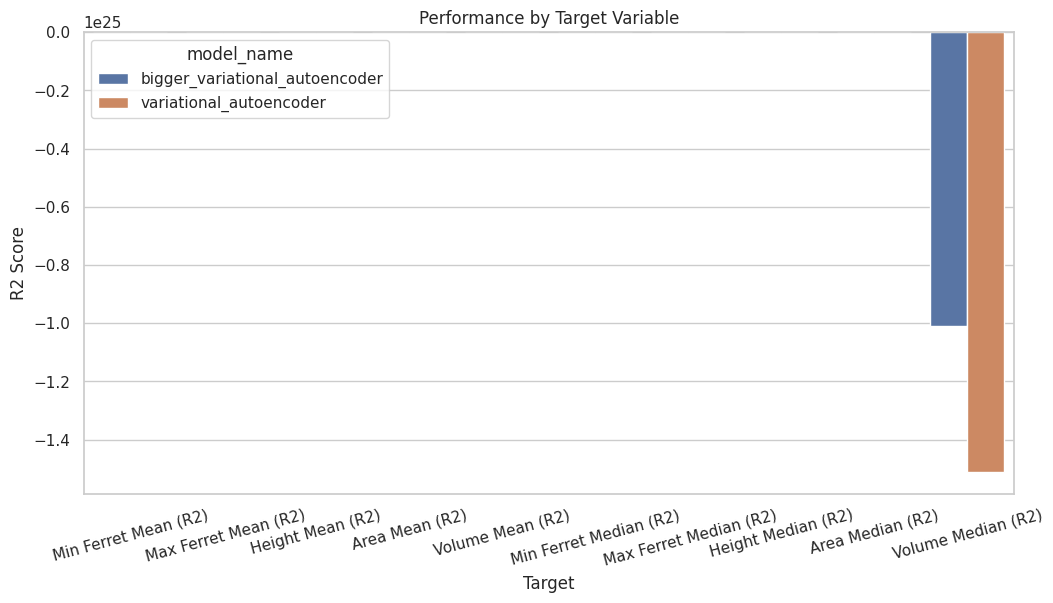

In [2]:
csv_path = "../experiments_leaderboard.csv"

if not os.path.exists(csv_path):
    print(f"Error: {csv_path} not found. Please run experiments first.")
else:
    df = pd.read_csv(csv_path)
    
    # Fix column name mismatch: CSV has 'model', notebook uses 'model_name'
    if 'model' in df.columns:
        df = df.rename(columns={'model': 'model_name'})

    # Calculate 'avg_r2' dynamically from available R2 columns
    r2_cols = [col for col in df.columns if '(R2)' in col]
    if r2_cols:
        df['avg_r2'] = df[r2_cols].mean(axis=1)

    # Convert timestamp to datetime
    print(f"Loaded {len(df)} experiments.")
    display(df)

# Dynamically select columns that contain '(R2)'
target_cols = [col for col in df.columns if '(R2)' in col]

if target_cols:
    # Melt dataframe for easier plotting with seaborn
    melted_df = df.melt(id_vars=['model_name', 'timestamp'], 
                        value_vars=target_cols, 
                        var_name='Target', 
                        value_name='R2 Score')
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=melted_df, x='Target', y='R2 Score', hue='model_name', errorbar=None)
    plt.title('Performance by Target Variable')
    # Removed ylim(0, 1) to visualize negative R2 scores present in the CSV
    plt.xticks(rotation=15)
    plt.show()

In [3]:
df.loc[2]

timestamp                                                         20251121_220827
run_id                                    variational_autoencoder_20251121_220827
model_name                                                variational_autoencoder
latent_dim                                                                      4
epochs                                                                       1500
lr                                                                          0.001
note                                                   Testing bigger autoencoder
checkpoint                      checkpoints/variational_autoencoder/variationa...
Min Ferret Mean (R2)                                                      -2.3649
 Min Ferret Mean (Low CI)                                                -18.2983
 Min Ferret Mean (High CI)                                                  0.271
 Max Ferret Mean (R2)                                                      -0.149
 Max Ferret Mean

## 2. Best Performing Models
Sorting experiments by the highest Average R2 Score.

In [4]:
if 'avg_r2' in df.columns:
    best_models = df.sort_values(by='avg_r2', ascending=False)
    display(best_models[['timestamp', 'model_name', 'latent_dim', 'avg_r2', 'note']].head(10))
else:
    print("Column 'avg_r2' not found in dataframe.")

,timestamp,model_name,latent_dim,avg_r2,note
4,20251121_230225,bigger_variational_autoencoder,3,-7.414700e-01,Testing bigger autoencoder
0,20251121_214714,bigger_variational_autoencoder,3,-7.708600e-01,Testing bigger autoencoder
3,20251121_221507,variational_autoencoder,4,-1.483614e+24,Testing bigger autoencoder
2,20251121_220827,variational_autoencoder,4,-1.540235e+24,Testing bigger autoencoder
1,20251121_215759,bigger_variational_autoencoder,4,-3.031650e+24,Testing bigger autoencoder


## 3. Performance by Model Architecture
Comparing how different architectures perform on average.

/tmp/ipykernel_9536/3851010286.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='model_name', y='avg_r2', palette='viridis')


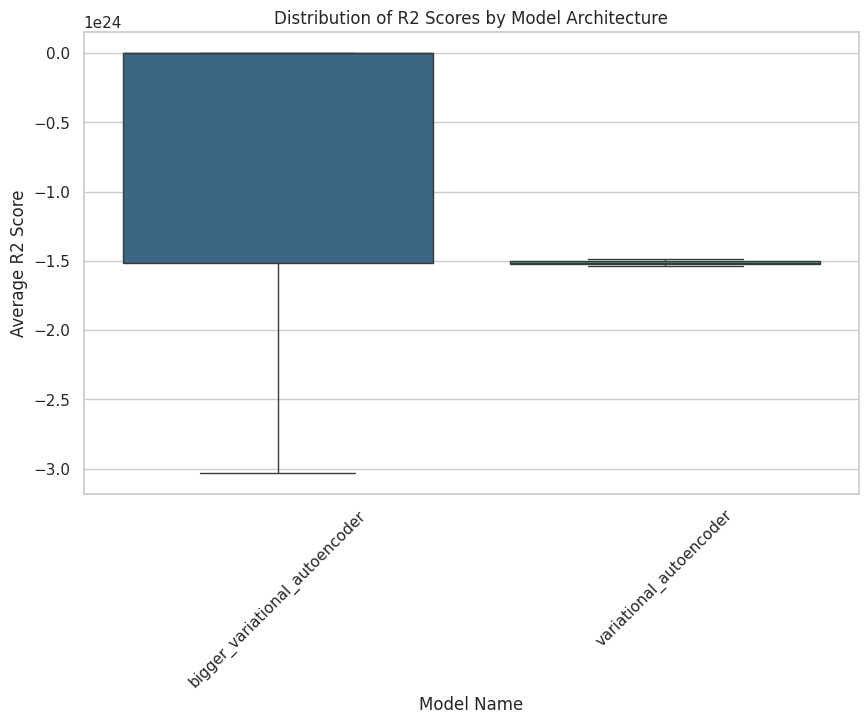

In [5]:
if 'avg_r2' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='model_name', y='avg_r2', palette='viridis')
    plt.title('Distribution of R2 Scores by Model Architecture')
    plt.ylabel('Average R2 Score')
    plt.xlabel('Model Name')
    plt.xticks(rotation=45)
    plt.show()

## 4. Impact of Latent Dimension
Does a larger latent space always lead to better regression performance?

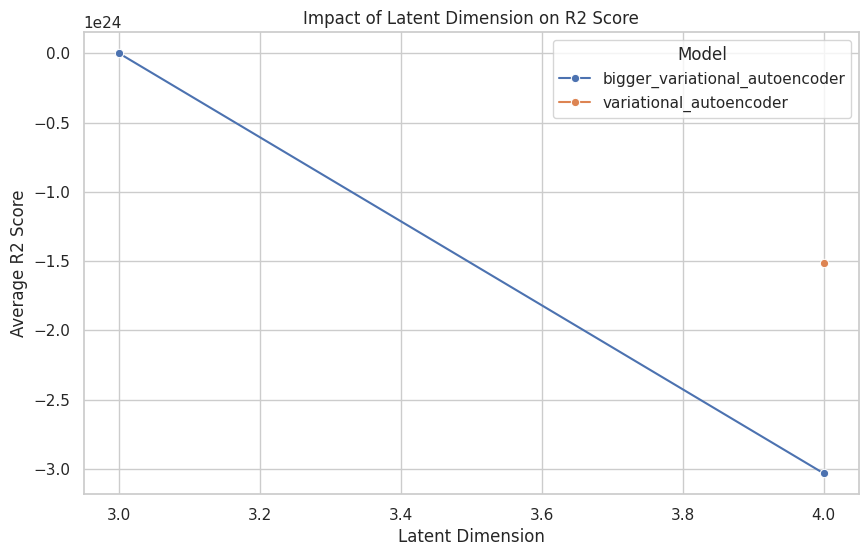

In [6]:
if 'avg_r2' in df.columns and 'latent_dim' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='latent_dim', y='avg_r2', hue='model_name', marker='o')
    plt.title('Impact of Latent Dimension on R2 Score')
    plt.ylabel('Average R2 Score')
    plt.xlabel('Latent Dimension')
    plt.legend(title='Model')
    plt.show()

## 5. Specific Target Predictions
Analyzing performance on specific physical properties (Height, Area, Volume).

In [7]:
target_cols = ['r2_Height', 'r2_Area', 'r2_Volume']
available_targets = [col for col in target_cols if col in df.columns]

if available_targets:
    # Melt dataframe for easier plotting with seaborn
    melted_df = df.melt(id_vars=['model_name', 'timestamp'], 
                        value_vars=available_targets, 
                        var_name='Target', 
                        value_name='R2 Score')
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=melted_df, x='Target', y='R2 Score', hue='model_name', errorbar=None)
    plt.title('Performance by Target Variable')
    plt.ylim(0, 1)  # R2 is typically max 1
    plt.show()